In [201]:
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba

In [202]:
def map_range(value, min_, max_):
        return ((value-np.min(value))/(np.max(value)-np.min(value))) * (max_ - min_)


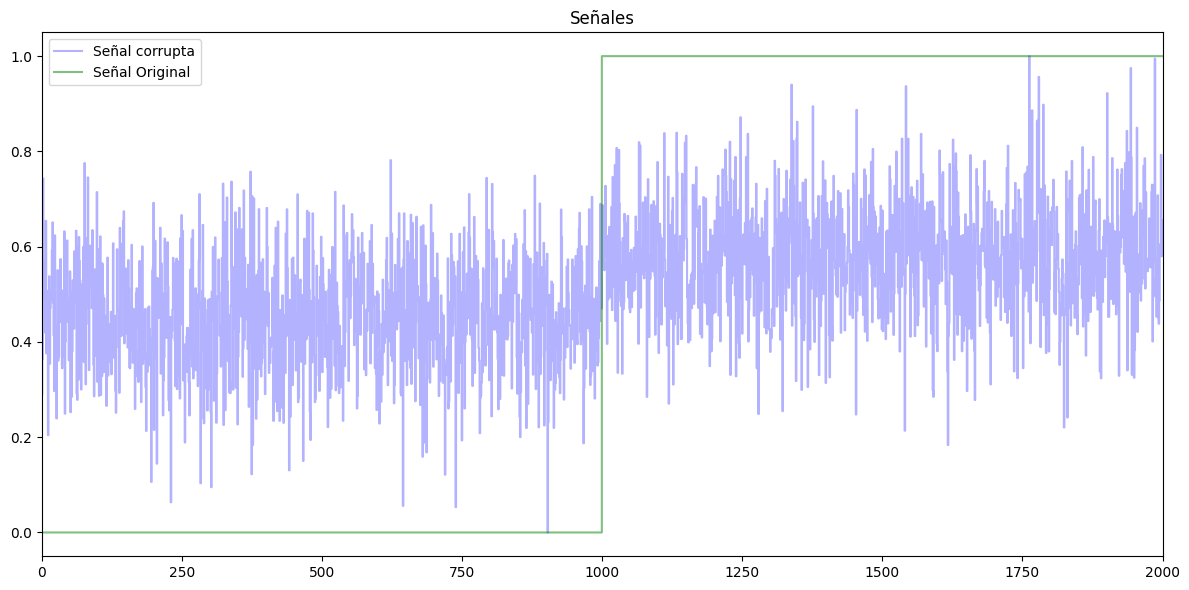

(2000, 1)
(2000, 1)


In [203]:
a1 = 1       # Valor del símbolo a1
a0 = 0    # Valor del símbolo a0
Nsamples = 1000 # Muestras de tiempo por símbolo
# Probabilidades de los símbolos
p_0 = 0.5
p_1 = 1 - p_0

amp_noise = 1

Nsymbols = 2 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

time = np.linspace(0, N, N)

# Genera una secuencia de símbolos basados en las probabilidades dadas
#data = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
data = np.array([a0, a1])

# Repite cada símbolo según el número de muestras por símbolo
data = np.concatenate([[v]*Nsamples for v in data])
message_org = data  # Almacena la secuencia completa en la variable 'message'

o2 = 1

noise = np.random.normal(0, o2, N)

message_corrupt  = message_org + noise*amp_noise


message_corrupt = message_corrupt.reshape(-1, 1)  # Redimensionar para que cada muestra sea un vector de entrada
message_org = message_org.reshape(-1, 1)   

message_corrupt = map_range(message_corrupt, 0, 1)
message_org = map_range(message_org, 0, 1)


plt.figure(figsize=(12,6),tight_layout=True)  #modificar el tamaño (x,y)
plt.step(time,message_corrupt, '-b', label='Señal corrupta', alpha=0.3)
plt.step(time,message_org, '-g',label='Señal Original', alpha = 0.5)
#plt.step(time,y_pred_test, '-r',label='Señal Recuperada', alpha=0.3)
plt.xlim(0,int(N/1))
plt.title(f'Señales')
plt.legend()
plt.show()


print(message_corrupt.shape)
print(message_org.shape)

In [204]:

entrada = tf.keras.layers.Dense(units=1, input_shape=[1])
#entrada = tf.keras.layers.Flatten(uints=2, input_shape=(len(message_org),1)), #1 - blanco y negro
capa1   = tf.keras.layers.Dense(units=20, activation='relu')
capa2   = tf.keras.layers.Dense(units=20, activation='relu')
capa3   = tf.keras.layers.Dense(units=20, activation='relu')
salida  = tf.keras.layers.Dense(units=2, activation='softmax')
modelo  = tf.keras.Sequential([entrada, capa1, capa2,capa3, salida])


# Compilación del modelo
modelo.compile(optimizer='adam', 
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy']
              )

historial=modelo.fit(message_corrupt, message_org, epochs=20)

# Evaluación del modelo
#loss, accuracy = modelo.evaluate(X_test, y_test)

#print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predecir y evaluar los resultados
y_pred_test = modelo.predict(message_corrupt)




Epoch 1/20
63/63 [==============================] - 2s 5ms/step - loss: 0.6885 - accuracy: 0.5390
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6736 - accuracy: 0.5900
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.6815
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.5961 - accuracy: 0.6915
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.5779 - accuracy: 0.7000
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.5780 - accuracy: 0.6960
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.5719 - accuracy: 0.7000
Epoch 8/20
63/63 [==============================] - 0s 5ms/step - loss: 0.5734 - accuracy: 0.7060
Epoch 9/20
63/63 [==============================] - 0s 5ms/step - loss: 0.5705 - accuracy: 0.7000
Epoch 10/20
63/63 [==============================] - 0s 6ms/step - loss: 0.5709 - accuracy: 0.7060
Epoch 11/20
63/63 [

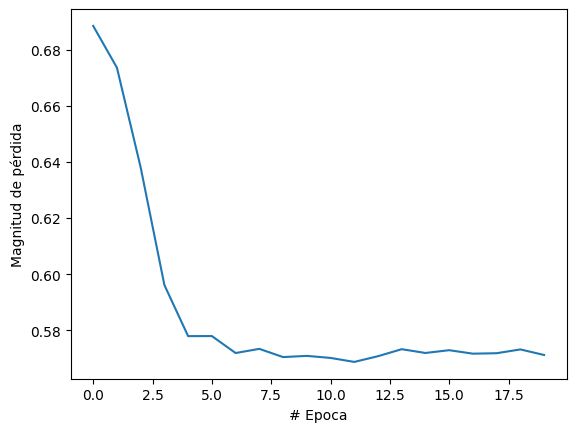

In [205]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

157/157 [==============================] - 1s 5ms/step
[0.18763441 0.81236553]
Original: 1 - Reconstruida: [0.18763441 0.81236553]
Original: 1 - Reconstruida: [0.17189078 0.8281092 ]
Original: 1 - Reconstruida: [0.13832437 0.8616756 ]
Original: 1 - Reconstruida: [0.26321632 0.73678374]
Original: 1 - Reconstruida: [0.23709528 0.7629047 ]
Original: 1 - Reconstruida: [0.31302047 0.68697953]
Original: 0 - Reconstruida: [0.8905301  0.10946995]
Original: 1 - Reconstruida: [0.2543456  0.74565434]
Original: 0 - Reconstruida: [0.91208    0.08791998]
Original: 0 - Reconstruida: [0.81922126 0.18077867]


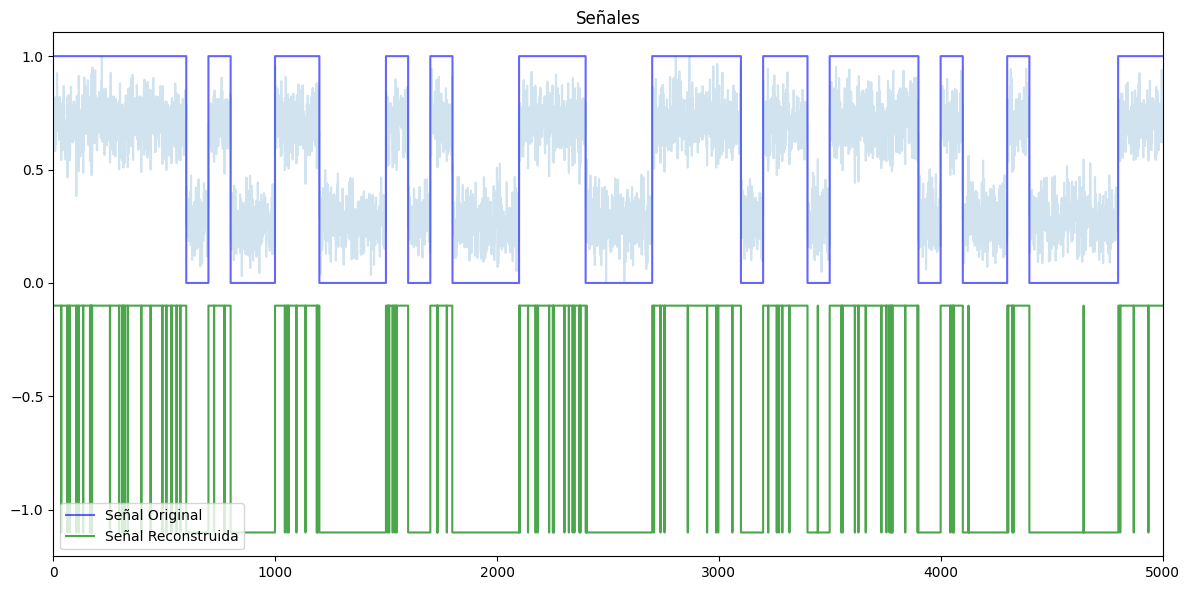

In [211]:
a1 = 1       # Valor del símbolo a1
a0 = 0    # Valor del símbolo a0
Nsamples = 100 # Muestras de tiempo por símbolo
# Probabilidades de los símbolos
p_0 = 0.5
p_1 = 1 - p_0

amp_noise = 0.2

Nsymbols = 50 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

time = np.linspace(0, N, N)

data_test = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
data_test = np.concatenate([[v]*Nsamples for v in data_test])


message_test = data_test
noise_test = np.random.normal(0, o2, N)
message_corrupt_test  = message_test + noise_test*amp_noise
message_corrupt_test = message_corrupt_test.reshape(-1, 1)  # Redimensionar para que cada muestra sea un vector de entrada

message_corrupt_test = map_range(message_corrupt_test,0,1)

message_predict = modelo.predict(message_corrupt_test)
#message_predict_ = message_predict.reshape(1, -1)[0]


print(message_predict[0])

#print(max(message_predict_))

for i in range(0,1000,100):
    print(f"Original: {message_test[i]} - Reconstruida: {message_predict[i]}")

# Predecir y aplicar umbral

values = [-1.1,-0.1]
message_predict = [values[np.argmax(dato)] for dato in message_predict]

plt.figure(figsize=(12,6),tight_layout=True)  #modificar el tamaño (x,y)
plt.step(time,message_test, '-b', label='Señal Original', alpha=0.6)
plt.step(time,message_predict, '-g',label='Señal Reconstruida', alpha=0.7)
plt.step(time,message_corrupt_test, alpha=0.2)
plt.xlim(0,int(N))
plt.title(f'Señales')
plt.legend()
plt.show()



(array([2288.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2712.]),
 array([-1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1]),
 <BarContainer object of 10 artists>)

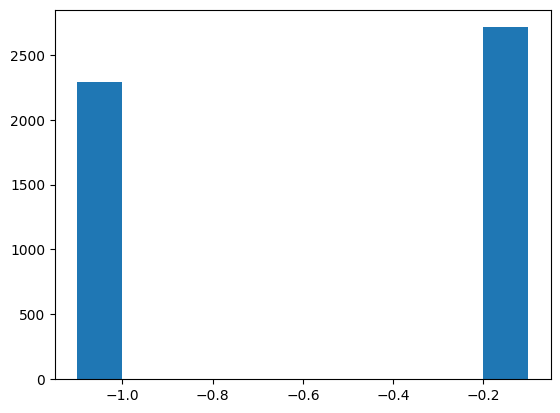

In [212]:
plt.hist(message_predict)